In [20]:
pip install pyspark

In [21]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-diabetes').getOrCreate()

In [22]:
df = spark.read.csv('/content/diabetes.csv', header = True, inferSchema = True)
df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Input variables: Glucose,BloodPressure,BMI,Age,Pregnancies,Insulin,SkinThikness,DiabetesPedigreeFunction.

Output variables: Outcome.

In [23]:
import pandas as pd

pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
Pregnancies,6.000,1.000,8.000,1.000,0.000
Glucose,148.000,85.000,183.000,89.000,137.000
BloodPressure,72.000,66.000,64.000,66.000,40.000
SkinThickness,35.000,29.000,0.000,23.000,35.000
Insulin,0.000,0.000,0.000,94.000,168.000
BMI,33.600,26.600,23.300,28.100,43.100
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288
Age,50.000,31.000,32.000,21.000,33.000
Outcome,1.000,0.000,1.000,0.000,1.000


In [24]:
df.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


In [25]:
df.toPandas()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [26]:
df.groupby('Outcome').count().toPandas()

,Outcome,count
0,1,268
1,0,500


In [27]:
# making numerical features
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']

In [28]:
numeric_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'Age',
 'Outcome']

In [29]:
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Pregnancies,768,3.8450520833333335,3.36957806269887,0,17
Glucose,768,120.89453125,31.97261819513622,0,199
BloodPressure,768,69.10546875,19.355807170644777,0,122
SkinThickness,768,20.536458333333332,15.952217567727642,0,99
Insulin,768,79.79947916666667,115.24400235133803,0,846
Age,768,33.240885416666664,11.760231540678689,21,81
Outcome,768,0.3489583333333333,0.476951377242799,0,1


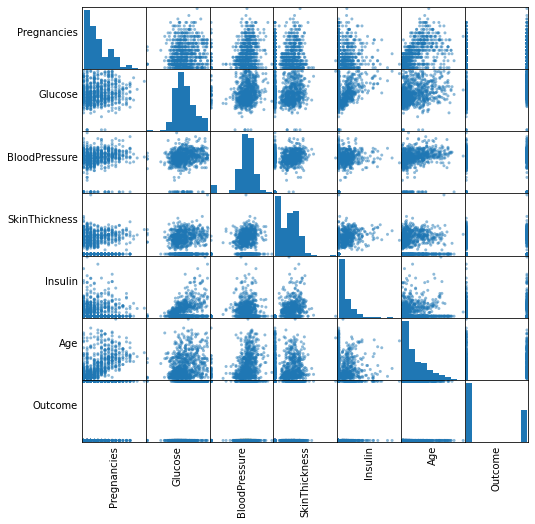

In [30]:
from pandas.plotting import scatter_matrix
numeric_data = df.select(numeric_features).toPandas()

axs = scatter_matrix(numeric_data, figsize=(8, 8));

# Rotate axis labels and remove axis ticks
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [31]:
from pyspark.sql.functions import isnull, when, count, col

df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin|BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|          0|      0|            0|            0|      0|  0|                       0|  0|      0|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+



 That's great in this datasets haven't any missing values.

In [51]:
dataset = df.drop('SkinThickness')


In [52]:
dataset = dataset.drop('Insulin')


In [53]:
dataset.show()

+-----------+-------+-------------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+----+------------------------+---+-------+
|          6|    148|           72|33.6|                   0.627| 50|      1|
|          1|     85|           66|26.6|                   0.351| 31|      0|
|          8|    183|           64|23.3|                   0.672| 32|      1|
|          1|     89|           66|28.1|                   0.167| 21|      0|
|          0|    137|           40|43.1|                   2.288| 33|      1|
|          5|    116|           74|25.6|                   0.201| 30|      0|
|          3|     78|           50|31.0|                   0.248| 26|      1|
|         10|    115|            0|35.3|                   0.134| 29|      0|
|          2|    197|           70|30.5|                   0.158| 53|      1|
|          8|    125|           96| 0.0|                   0.232

In [55]:
dataset_new = dataset.drop('DiabetesPedigreeFunction')
dataset_new.show()

+-----------+-------+-------------+----+---+-------+
|Pregnancies|Glucose|BloodPressure| BMI|Age|Outcome|
+-----------+-------+-------------+----+---+-------+
|          6|    148|           72|33.6| 50|      1|
|          1|     85|           66|26.6| 31|      0|
|          8|    183|           64|23.3| 32|      1|
|          1|     89|           66|28.1| 21|      0|
|          0|    137|           40|43.1| 33|      1|
|          5|    116|           74|25.6| 30|      0|
|          3|     78|           50|31.0| 26|      1|
|         10|    115|            0|35.3| 29|      0|
|          2|    197|           70|30.5| 53|      1|
|          8|    125|           96| 0.0| 54|      1|
|          4|    110|           92|37.6| 30|      0|
|         10|    168|           74|38.0| 34|      1|
|         10|    139|           80|27.1| 57|      0|
|          1|    189|           60|30.1| 59|      1|
|          5|    166|           72|25.8| 51|      1|
|          7|    100|            0|30.0| 32|  

In [57]:
dataset_final = dataset_new.drop('Pregnancies')

dataset_final.show()

+-------+-------------+----+---+-------+
|Glucose|BloodPressure| BMI|Age|Outcome|
+-------+-------------+----+---+-------+
|    148|           72|33.6| 50|      1|
|     85|           66|26.6| 31|      0|
|    183|           64|23.3| 32|      1|
|     89|           66|28.1| 21|      0|
|    137|           40|43.1| 33|      1|
|    116|           74|25.6| 30|      0|
|     78|           50|31.0| 26|      1|
|    115|            0|35.3| 29|      0|
|    197|           70|30.5| 53|      1|
|    125|           96| 0.0| 54|      1|
|    110|           92|37.6| 30|      0|
|    168|           74|38.0| 34|      1|
|    139|           80|27.1| 57|      0|
|    189|           60|30.1| 59|      1|
|    166|           72|25.8| 51|      1|
|    100|            0|30.0| 32|      1|
|    118|           84|45.8| 31|      1|
|    107|           74|29.6| 31|      1|
|    103|           30|43.3| 33|      0|
|    115|           70|34.6| 32|      1|
+-------+-------------+----+---+-------+
only showing top

Features Convert into Vector

In [58]:
# Assemble all the features with VectorAssembler
required_features = ['Glucose','BloodPressure','BMI','Age']

from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=required_features, outputCol='features')

transformed_data = assembler.transform(dataset_final)
transformed_data.show()

+-------+-------------+----+---+-------+--------------------+
|Glucose|BloodPressure| BMI|Age|Outcome|            features|
+-------+-------------+----+---+-------+--------------------+
|    148|           72|33.6| 50|      1|[148.0,72.0,33.6,...|
|     85|           66|26.6| 31|      0|[85.0,66.0,26.6,3...|
|    183|           64|23.3| 32|      1|[183.0,64.0,23.3,...|
|     89|           66|28.1| 21|      0|[89.0,66.0,28.1,2...|
|    137|           40|43.1| 33|      1|[137.0,40.0,43.1,...|
|    116|           74|25.6| 30|      0|[116.0,74.0,25.6,...|
|     78|           50|31.0| 26|      1|[78.0,50.0,31.0,2...|
|    115|            0|35.3| 29|      0|[115.0,0.0,35.3,2...|
|    197|           70|30.5| 53|      1|[197.0,70.0,30.5,...|
|    125|           96| 0.0| 54|      1|[125.0,96.0,0.0,5...|
|    110|           92|37.6| 30|      0|[110.0,92.0,37.6,...|
|    168|           74|38.0| 34|      1|[168.0,74.0,38.0,...|
|    139|           80|27.1| 57|      0|[139.0,80.0,27.1,...|
|    189

Train and Test Split





Randomly split data into train and test sets, and set seed for reproducibility.

In [59]:
# Split the data

(training_data, test_data) = transformed_data.randomSplit([0.8,0.2], seed =2020)

print("Training Dataset Count: " + str(training_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

Training Dataset Count: 620
Test Dataset Count: 148


Decision Tree Classifier

Decision trees are widely used since they are easy to interpret, handle categorical features, extend to the multiclass classification setting, do not require feature scaling, and are able to capture non-linearities and feature interactions.

In [60]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'Outcome', maxDepth = 3)

dtModel = dt.fit(training_data)

dt_predictions = dtModel.transform(test_data)

dt_predictions.select('Glucose', 'BloodPressure', 'BMI', 'Age', 'Outcome').show(10)

+-------+-------------+----+---+-------+
|Glucose|BloodPressure| BMI|Age|Outcome|
+-------+-------------+----+---+-------+
|     57|           80|32.8| 41|      0|
|     67|           76|45.3| 46|      0|
|     71|           48|20.4| 22|      0|
|     71|           78|33.2| 21|      0|
|     72|           78|31.6| 38|      0|
|     76|           60|32.8| 41|      0|
|     78|           50|31.0| 26|      1|
|     78|           88|36.9| 21|      0|
|     84|           64|35.8| 21|      0|
|     84|           82|38.2| 23|      0|
+-------+-------------+----+---+-------+
only showing top 10 rows



Evaluate our Decision Tree model.

In [61]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

multi_evaluator = MulticlassClassificationEvaluator(labelCol = 'Outcome', metricName = 'accuracy')
print('Decision Tree Accuracy:', multi_evaluator.evaluate(dt_predictions))

Decision Tree Accuracy: 0.7702702702702703


Gradient-boosted Tree classifier Model


Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. 

In [62]:
from pyspark.ml.classification import GBTClassifier
gb = GBTClassifier(labelCol = 'Outcome', featuresCol = 'features')
gbModel = gb.fit(training_data)
gb_predictions = gbModel.transform(test_data)

Evaluate our Gradient-Boosted Tree Classifier.

In [63]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
multi_evaluator = MulticlassClassificationEvaluator(labelCol = 'Outcome', metricName = 'accuracy')
print('Gradient-boosted Trees Accuracy:', multi_evaluator.evaluate(gb_predictions))

Gradient-boosted Trees Accuracy: 0.7567567567567568
